In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import nasapy
import nasa



from api_keys import api_key


In [77]:
Asteroids = pd.read_csv("Asteroid.csv")
Asteroids

,Date,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
0,2019-01-01,3837557,(2019 AN),24.200,8.368577,2019-01-01,0.085909,0.038420,False,1.910837e+07,Earth
1,2019-01-01,3398654,(2007 YS56),25.700,6.461135,2019-01-01,0.043057,0.019256,False,1.798761e+07,Earth
2,2019-01-01,3398652,(2007 YQ56),19.900,15.429487,2019-01-01,0.622358,0.278327,True,1.144099e+07,Earth
3,2019-01-01,3837538,(2018 YV2),24.200,11.718652,2019-01-01,0.085909,0.038420,False,1.022072e+07,Earth
4,2019-01-01,3771017,(2017 EV2),20.800,13.642474,2019-01-01,0.411188,0.183889,False,7.033567e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...
5044,2019-12-31,2006239,6239 Minos (1989 QF),18.500,9.007412,2019-12-31,1.185878,0.530341,True,6.346829e+07,Earth
5045,2019-12-31,3555072,(2011 AH5),26.000,17.980102,2019-12-31,0.037501,0.016771,False,4.341405e+07,Earth
5046,2019-12-31,3976544,(2020 AA2),27.000,9.714685,2019-12-31,0.023661,0.010582,False,1.643657e+06,Earth
5047,2019-12-31,3893722,(2019 WR4),26.065,4.236817,2019-12-31,0.036395,0.016276,False,4.493435e+06,Earth


In [78]:
Asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     5049 non-null   object 
 1   ID                       5049 non-null   int64  
 2   Name                     5049 non-null   object 
 3   Absolute Magnitude       5049 non-null   float64
 4   Relative Velocity (k/s)  5049 non-null   float64
 5   Close Approach Date      5049 non-null   object 
 6   Estimated Max Diameter   5049 non-null   float64
 7   Estimated Min Diameter   5049 non-null   float64
 8   Potentially Hazardous?   5049 non-null   bool   
 9   Miss Distance (km)       5049 non-null   float64
 10  Orbiting Body            5049 non-null   object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 399.5+ KB


In [79]:
Asteroids["ID"].nunique()

4510

In [80]:
Asteroids_by_ID=Asteroids.groupby('ID')
Asteroids_by_ID.head()

,Date,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
0,2019-01-01,3837557,(2019 AN),24.200,8.368577,2019-01-01,0.085909,0.038420,False,1.910837e+07,Earth
1,2019-01-01,3398654,(2007 YS56),25.700,6.461135,2019-01-01,0.043057,0.019256,False,1.798761e+07,Earth
2,2019-01-01,3398652,(2007 YQ56),19.900,15.429487,2019-01-01,0.622358,0.278327,True,1.144099e+07,Earth
3,2019-01-01,3837538,(2018 YV2),24.200,11.718652,2019-01-01,0.085909,0.038420,False,1.022072e+07,Earth
4,2019-01-01,3771017,(2017 EV2),20.800,13.642474,2019-01-01,0.411188,0.183889,False,7.033567e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...
5044,2019-12-31,2006239,6239 Minos (1989 QF),18.500,9.007412,2019-12-31,1.185878,0.530341,True,6.346829e+07,Earth
5045,2019-12-31,3555072,(2011 AH5),26.000,17.980102,2019-12-31,0.037501,0.016771,False,4.341405e+07,Earth
5046,2019-12-31,3976544,(2020 AA2),27.000,9.714685,2019-12-31,0.023661,0.010582,False,1.643657e+06,Earth
5047,2019-12-31,3893722,(2019 WR4),26.065,4.236817,2019-12-31,0.036395,0.016276,False,4.493435e+06,Earth


In [50]:
single_asteroid=Asteroids.drop_duplicates("ID",keep='first')
single_asteroid.count()

Date                       4510
ID                         4510
Name                       4510
Absolute Magnitude         4510
Relative Velocity (k/s)    4510
Close Approach Date        4510
Estimated Max Diameter     4510
Estimated Min Diameter     4510
Potentially Hazardous?     4510
Miss Distance (km)         4510
Orbiting Body              4510
dtype: int64

In [49]:
Asteroids.count()

Date                       5049
ID                         5049
Name                       5049
Absolute Magnitude         5049
Relative Velocity (k/s)    5049
Close Approach Date        5049
Estimated Max Diameter     5049
Estimated Min Diameter     5049
Potentially Hazardous?     5049
Miss Distance (km)         5049
Orbiting Body              5049
dtype: int64

In [58]:
Pos_Hazard=single_asteroid.loc[single_asteroid["Potentially Hazardous?"] == True]
Pos_Hazard

,Date,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
2,2019-01-01,3398652,(2007 YQ56),19.9,15.429487,2019-01-01,0.622358,0.278327,True,1.144099e+07,Earth
8,2019-01-01,2527715,527715 (2007 YQ56),19.9,15.429488,2019-01-01,0.622358,0.278327,True,1.144099e+07,Earth
32,2019-01-03,2357022,357022 (1999 YG3),19.0,25.901881,2019-01-03,0.941976,0.421265,True,4.865035e+07,Earth
38,2019-01-04,3263453,(2004 XP14),19.4,17.176591,2019-01-04,0.783502,0.350393,True,1.093730e+07,Earth
55,2019-01-05,2267729,267729 (2003 FC5),18.3,13.317079,2019-01-05,1.300289,0.581507,True,3.724010e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...
4978,2019-12-26,2310442,310442 (2000 CH59),19.9,12.273017,2019-12-26,0.622358,0.278327,True,7.291408e+06,Earth
4990,2019-12-27,2267221,267221 (2001 AD2),19.7,25.924487,2019-12-27,0.682402,0.305179,True,2.097858e+07,Earth
4996,2019-12-28,2136849,136849 (1998 CS1),17.6,32.012844,2019-12-28,1.794899,0.802703,True,6.997161e+07,Earth
5003,2019-12-28,3893728,(2019 WX4),21.0,17.719711,2019-12-28,0.375008,0.167708,True,4.165681e+07,Earth


In [64]:
mean_mag=Pos_Hazard["Absolute Magnitude"].mean()
mean_Rvel=Pos_Hazard["Relative Velocity (k/s)"].mean()

<BarContainer object of 409 artists>

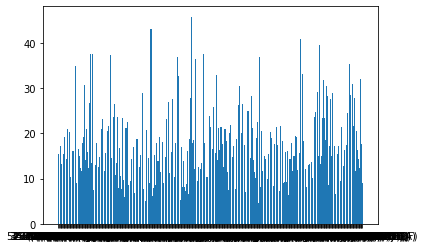

In [62]:
plt.bar(Pos_Hazard["Name"], Pos_Hazard["Relative Velocity (k/s)"])

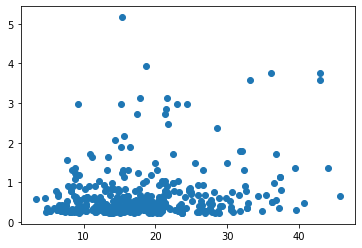

In [60]:
plt.scatter(Pos_Hazard["Relative Velocity (k/s)"], Pos_Hazard["Estimated Max Diameter"])

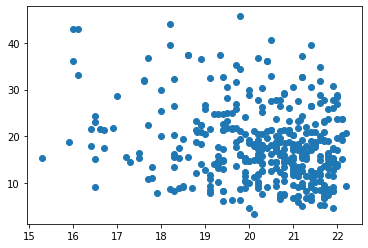

In [67]:
plt.scatter(Pos_Hazard["Absolute Magnitude"], Pos_Hazard["Relative Velocity (k/s)"])

Text(0, 0.5, 'Est. Max Dia')

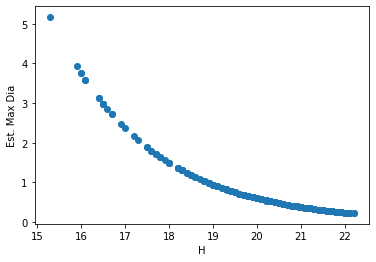

In [101]:
plt.scatter(Pos_Hazard["Absolute Magnitude"], Pos_Hazard["Estimated Max Diameter"])
plt.xlabel("H")
plt.ylabel("Est. Max Dia")

In [86]:
Asteroids_dates=pd.read_csv("Asteroid_dates.csv")
Asteroids_dates.columns

Index(['Date', 'Month', 'Day', 'ID', 'Name', 'Absolute Magnitude',
       'Relative Velocity (k/s)', 'Close Approach Date',
       'Estimated Max Diameter', 'Estimated Min Diameter',
       'Potentially Hazardous?', 'Miss Distance (km)', 'Orbiting Body'],
      dtype='object')

In [92]:
Asteroids_months=Asteroids_dates.groupby("Month")

In [98]:
Asteroids_months.describe()

Day                                                       ID  \
       count       mean       std  min   25%   50%   75%   max  count   
Month                                                                   
Apr    415.0  15.956627  8.448082  1.0  9.00  16.0  23.0  30.0  415.0   
Aug    379.0  16.229551  8.648490  1.0  9.00  17.0  23.5  31.0  379.0   
Dec    394.0  16.319797  8.874830  1.0  9.00  16.5  24.0  31.0  394.0   
Feb    337.0  14.430267  8.086329  1.0  7.00  15.0  21.0  28.0  337.0   
Jan    461.0  16.420824  8.822200  1.0  9.00  16.0  25.0  31.0  461.0   
Jul    376.0  16.103723  8.903176  1.0  8.00  16.0  24.0  31.0  376.0   
Jun    319.0  15.592476  8.784460  1.0  8.00  16.0  23.0  30.0  319.0   
Mar    391.0  16.503836  9.281046  1.0  8.00  16.0  25.0  31.0  391.0   
May    412.0  15.461165  9.460171  1.0  6.75  15.5  24.0  31.0  412.0   
Nov    430.0  14.446512  8.562981  1.0  7.00  14.0  22.0  30.0  430.0   
Oct    614.0  16.350163  8.975017  1.0  9.00  16.0  24.0  31.0  614.0   
Sep    521.0  16.295585  8.737681  1.0  9.00  17.0  24.0  30.0  521.0   

                     ... Estimated Min Diameter            Miss Distance (km)  \
               mean  ...                    75%        max              count   
Month                ...                                                        
Apr    5.323842e+06  ...               0.110804   1.677085              415.0   
Aug    4.268195e+06  ...               0.146068   3.346224              379.0   
Dec    4.908718e+06  ...               0.144812   1.756123              394.0   
Feb    4.159243e+06  ...               0.152952   1.756123              337.0   
Jan    4.246947e+06  ...               0.152952  22.108281              461.0   
Jul    3.999958e+06  ...               0.183889   2.315021              376.0   
Jun    4.978890e+06  ...               0.146068   8.801465              319.0   
Mar    4.332467e+06  ...               0.124269   3.195619              391.0   
May    5.522587e+06  ...               0.167708   2.111324              412.0   
Nov    4.973058e+06  ...               0.110804   1.677085              430.0   
Oct    5.657577e+06  ...               0.095420   1.677085              614.0   
Sep    4.571039e+06  ...               0.127220   1.601603              521.0   

                                                                             \
               mean           std           min           25%           50%   
Month                                                                         
Apr    3.043409e+07  2.308604e+07   13121.45357  7.587166e+06  2.659291e+07   
Aug    3.381391e+07  2.106880e+07   49349.15088  1.482583e+07  3.350774e+07   
Dec    3.175856e+07  2.373959e+07   65270.49315  8.301094e+06  3.003160e+07   
Feb    3.302896e+07  2.333359e+07  118653.86470  1.030301e+07  3.009274e+07   
Jan    2.941816e+07  2.272320e+07   15065.28342  8.055770e+06  2.648512e+07   
Jul    3.365178e+07  2.294737e+07   71355.07235  1.270949e+07  3.164979e+07   
Jun    3.403651e+07  2.321678e+07   83610.04011  1.184627e+07  3.323362e+07   
Mar    3.027243e+07  2.417799e+07   23451.21642  7.276073e+06  2.450566e+07   
May    3.396685e+07  2.338793e+07   71545.40572  1.190222e+07  3.247027e+07   
Nov    2.878247e+07  2.338049e+07   85223.42321  6.402339e+06  2.248654e+07   
Oct    2.741351e+07  2.317769e+07   12613.43417  6.076510e+06  2.071041e+07   
Sep    2.849971e+07  2.242437e+07   37871.49366  7.486049e+06  2.397606e+07   

                                  
                75%          max  
Month                             
Apr    5.023788e+07  74751302.71  
Aug    5.115616e+07  74502383.04  
Dec    5.272776e+07  74708183.34  
Feb    5.401258e+07  74766814.53  
Jan    4.658723e+07  74729576.07  
Jul    5.392161e+07  74699017.45  
Jun    5.423785e+07  74123758.31  
Mar    5.291228e+07  74244917.91  
May    5.441890e+07  74726725.42  
Nov    4.855126e+07  74693394.72  
Oct    4.745054e+07  74761430.19  
Sep    4.742672e+07  